# Portfolio Optimization using Modern Portfolio Theory for Risk Averse and Risk Tolerant Investors.


* We have selected stocks from different sectors for diversification and will come up with an optmized portfolio by employing the concepts given by Markowitz in Modern Portfolio Theory. The portfolio will be optimized basis the risk appetitte of the individual. Stocks selected from different sectors are as follows:-

1. FMCG  - ITC
2. Banking - HDFC Bank 
3. Technology - TCS
4. Real Estate -  DLF

In [ ]:
#! pip install pandas-datareader

In [50]:
import numpy as np 
import pandas as pd
from pandas_datareader import data
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data

* Time period - 5 years (from 2017 to 2019)

In [39]:
df = data.DataReader(['ITC.NS', 'HDFCBANK.NS', 'TCS.NS', 'DLF.NS'], 'yahoo', start='2017/01/01', end='2021/12/31')
df.head()

Attributes   Adj Close                                            Close  \
Symbols         ITC.NS HDFCBANK.NS       TCS.NS      DLF.NS      ITC.NS   
Date                                                                      
2017-01-02  197.290619  576.642639  1057.592896  112.241699  240.949997   
2017-01-03  199.255753  573.174377  1060.683228  112.572655  243.350006   
2017-01-04  200.975204  571.054993  1065.721680  118.671715  245.449997   
2017-01-05  202.039658  571.392029  1045.522217  119.759171  246.750000   
2017-01-06  198.723511  574.980774  1021.785034  119.664612  242.699997   

Attributes                                             High              ...  \
Symbols    HDFCBANK.NS       TCS.NS      DLF.NS      ITC.NS HDFCBANK.NS  ...   
Date                                                                     ...   
2017-01-02  598.549988  1180.675049  118.699997  242.250000  605.049988  ...   
2017-01-03  594.950012  1184.125000  119.050003  245.699997  600.974976  ...   
2017-01-04  592.750000  1189.750000  125.500000  247.000000  596.000000  ...   
2017-01-05  593.099976  1167.199951  126.650002  247.850006  597.250000  ...   
2017-01-06  596.825012  1140.699951  126.550003  249.000000  599.200012  ...   

Attributes          Low                    Open                           \
Symbols          TCS.NS      DLF.NS      ITC.NS HDFCBANK.NS       TCS.NS   
Date                                                                       
2017-01-02  1176.199951  113.949997  242.000000  604.724976  1183.300049   
2017-01-03  1171.650024  116.599998  240.899994  600.400024  1180.625000   
2017-01-04  1179.150024  119.050003  242.850006  594.924988  1184.849976   
2017-01-05  1160.199951  124.449997  244.500000  594.500000  1192.000000   
2017-01-06  1128.550049  125.050003  247.000000  595.049988  1160.500000   

Attributes                 Volume                                     
Symbols         DLF.NS     ITC.NS HDFCBANK.NS     TCS.NS      DLF.NS  
Date                                                                  
2017-01-02  116.000000  4887504.0   1854328.0   823132.0  17254054.0  
2017-01-03  118.800003  7508925.0   1923750.0  1475324.0  10163888.0  
2017-01-04  120.300003  9310104.0   3483560.0  1420066.0  15556248.0  
2017-01-05  126.449997  9178665.0   3388192.0  2216404.0  10194043.0  
2017-01-06  125.750000  8093288.0   2762630.0  3009896.0   8297099.0  

[5 rows x 24 columns]

In [40]:
#Working with only the Closing price of the stock for that day
df = df['Adj Close']
df.head()

Symbols,ITC.NS,HDFCBANK.NS,TCS.NS,DLF.NS
Date,,,,
2017-01-02,197.290619,576.642639,1057.592896,112.241699
2017-01-03,199.255753,573.174377,1060.683228,112.572655
2017-01-04,200.975204,571.054993,1065.721680,118.671715
2017-01-05,202.039658,571.392029,1045.522217,119.759171
2017-01-06,198.723511,574.980774,1021.785034,119.664612


## Covariance and Correlation Matrix

In [41]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,ITC.NS,HDFCBANK.NS,TCS.NS,DLF.NS
Symbols,,,,
ITC.NS,0.000302,0.000088,0.000049,0.000170
HDFCBANK.NS,0.000088,0.000249,0.000059,0.000185
TCS.NS,0.000049,0.000059,0.000259,0.000071
DLF.NS,0.000170,0.000185,0.000071,0.000834


In [42]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,ITC.NS,HDFCBANK.NS,TCS.NS,DLF.NS
Symbols,,,,
ITC.NS,1.000000,0.320209,0.176330,0.337945
HDFCBANK.NS,0.320209,1.000000,0.230544,0.405859
TCS.NS,0.176330,0.230544,1.000000,0.152421
DLF.NS,0.337945,0.405859,0.152421,1.000000


## Portfolio Variance

In [43]:
# Randomly weighted portfolio's variance
w = {'ITC.NS': 0.1, 'HDFCBANK.NS': 0.2, 'TCS.NS': 0.5, 'DLF.NS': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0001670719841092897

## Portfolio Expected Returns

In [44]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
ITC.NS        -0.006837
HDFCBANK.NS    0.128299
TCS.NS         0.317921
DLF.NS         0.178261
dtype: float64

In [45]:
# Portfolio Returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.21958890879171672

## Plotting the Efficient Frontier

In [46]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
ITC.NS         0.274661
HDFCBANK.NS    0.249322
TCS.NS         0.254652
DLF.NS         0.456636
dtype: float64

In [47]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
ITC.NS,-0.006837,0.274661
HDFCBANK.NS,0.128299,0.249322
TCS.NS,0.317921,0.254652
DLF.NS,0.178261,0.456636


In [90]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [91]:
for portfolio in tqdm(range(num_portfolios)):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1309.07it/s]


In [92]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [93]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,ITC.NS weight,HDFCBANK.NS weight,TCS.NS weight,DLF.NS weight
0,0.146990,0.188685,0.286703,0.339265,0.277440,0.096592
1,0.067533,0.228747,0.717799,0.026940,0.168132,0.087128
2,0.205512,0.200272,0.200692,0.121076,0.504425,0.173806
3,0.123796,0.221335,0.416083,0.124629,0.206060,0.253228
4,0.154276,0.183053,0.280441,0.358513,0.328196,0.032850


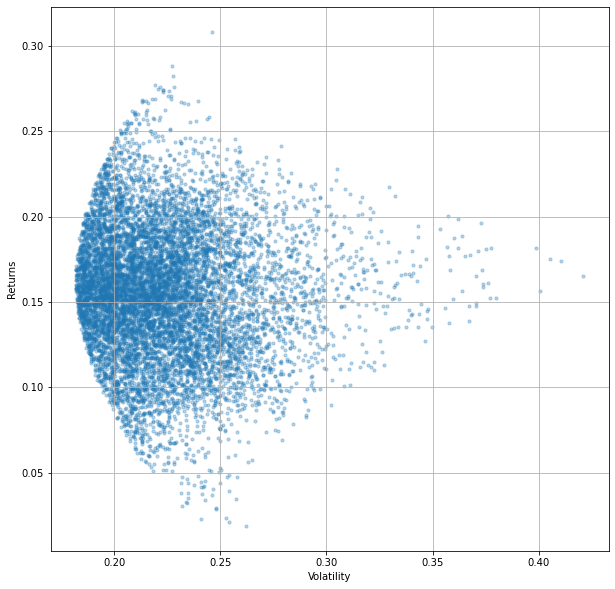

In [102]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])
plt.show()

In [95]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns               0.168559
Volatility            0.181897
ITC.NS weight         0.257010
HDFCBANK.NS weight    0.345001
TCS.NS weight         0.394583
DLF.NS weight         0.003406
Name: 5716, dtype: float64

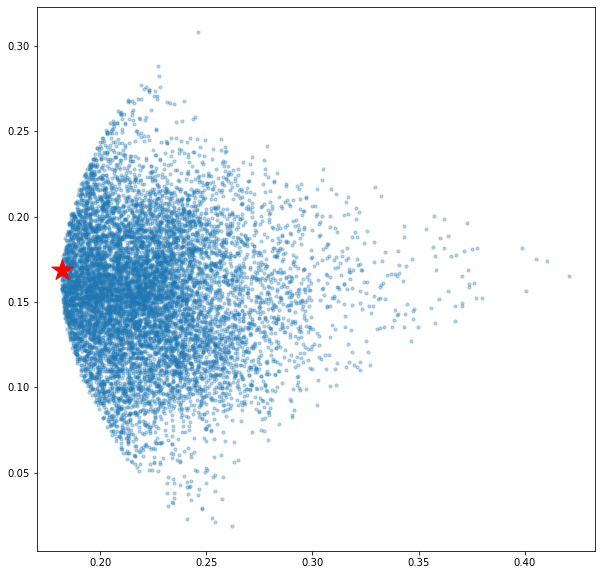

In [101]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.show()

## Optimal Risky Portfolio

In [97]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns               0.288189
Volatility            0.227249
ITC.NS weight         0.015274
HDFCBANK.NS weight    0.085431
TCS.NS weight         0.837914
DLF.NS weight         0.061381
Name: 8505, dtype: float64

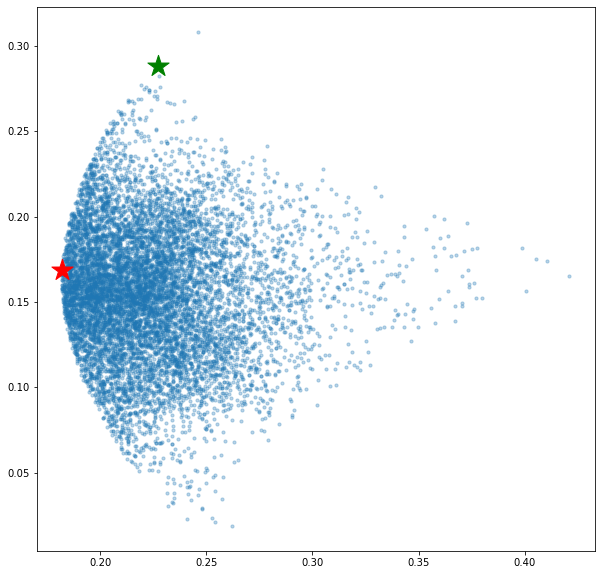

In [98]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

## Conclusions

* The red star denotes the minimum variance portfolio.
* The Green Star denotes the optimal Risky Portfolio.
* With slightly higher volatiltiy of just 4% increase (from 18% to 22%), there is an increse of 12% in returns (16% to 28%)